In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

## Idioms

In [3]:
df = pd.DataFrame( {
    "AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]
})

In [4]:
df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

## if-then...

In [5]:
# if-then in one column
df.loc[df.AAA >= 5, 'BBB'] = -1

In [6]:
df

AAA  BBB  CCC
0    4   10  100
1    5   -1   50
2    6   -1  -30
3    7   -1  -50

In [7]:
# if-then with two columns
df.loc[df.AAA >= 5, ['BBB', 'CCC']] = 555

In [8]:
df

AAA  BBB  CCC
0    4   10  100
1    5  555  555
2    6  555  555
3    7  555  555

In [9]:
# the else of the condition
df.loc[df.AAA < 5, ['BBB', 'CCC']] = 2000
df

AAA   BBB   CCC
0    4  2000  2000
1    5   555   555
2    6   555   555
3    7   555   555

In [10]:
df_mask = pd.DataFrame({
    "AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2
})

In [11]:
# doing a else with the where of pandas
df.where(df_mask, -1000)

AAA   BBB   CCC
0    4 -1000  2000
1    5 -1000 -1000
2    6 -1000   555
3    7 -1000 -1000

In [12]:
df = pd.DataFrame({
    "AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]
})

In [13]:
df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

In [14]:
# if-then-else -> numpy
df['logic'] = np.where(df.AAA > 5, 'high', 'low')

In [15]:
df

AAA  BBB  CCC logic
0    4   10  100   low
1    5   20   50   low
2    6   30  -30  high
3    7   40  -50  high

## Splitting

### Split a frame with a boolean criterion

In [16]:
df = pd.DataFrame({
    "AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]
})

In [17]:
df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

In [18]:
df[df.AAA <= 5]

AAA  BBB  CCC
0    4   10  100
1    5   20   50

In [19]:
df[df.AAA > 5]

AAA  BBB  CCC
2    6   30  -30
3    7   40  -50

## Building criteria

### Select with multi-column criteria

In [20]:
df = pd.DataFrame({
    "AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]
})

In [21]:
df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

In [22]:
# AND
df.loc[(df.BBB < 25) & (df.CCC >= -40), 'AAA']

0    4
1    5
Name: AAA, dtype: int64

In [23]:
# OR
df.loc[(df.BBB < 25) | (df.CCC >= -40), 'AAA']

0    4
1    5
2    6
Name: AAA, dtype: int64

In [24]:
df.loc[(df.BBB > 25) | (df.CCC  >= 75), 'AAA'] = 999

In [25]:
df

AAA  BBB  CCC
0  999   10  100
1    5   20   50
2  999   30  -30
3  999   40  -50

### Select rows with data closest to certain value using argsort

In [26]:
df = pd.DataFrame({
    "AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]
})

In [27]:
df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

In [28]:
aValue = 43.0

In [29]:
df.loc[(df.CCC - aValue).abs().argsort()]

AAA  BBB  CCC
1    5   20   50
0    4   10  100
2    6   30  -30
3    7   40  -50

### Dynamically reduce a list of criteria using a binary operators

In [30]:
df = pd.DataFrame({
    "AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]
})

In [31]:
df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

In [32]:
Crit1 = df.AAA <= 5.5

In [33]:
Crit2 = df.BBB == 10.0

In [34]:
Crit3 = df.CCC > -40.0

In [35]:
# hard code
AllCrit = [Crit1, Crit2, Crit3]

In [36]:
# dinamically built criteria
import functools

In [37]:
CritList = [Crit1, Crit2, Crit3]

AllCrit = functools.reduce(lambda x, y: x & y, CritList)

df[AllCrit]

AAA  BBB  CCC
0    4   10  100

## Selection

### Using both row labels and value conditionals

In [38]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [39]:
df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

In [40]:
df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

AAA  BBB  CCC
0    4   10  100
2    6   30  -30

In [41]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)

In [42]:
df

AAA  BBB  CCC
foo    4   10  100
bar    5   20   50
boo    6   30  -30
kar    7   40  -50

#### Positional-oriented (Python slicing style : exclusive of end)

#### Label-oriented (Non-Python slicing style : inclusive of end)

#### General (Either slicing style : depends on if the slice contains labels or positions)

In [43]:
df.loc['bar':'kar']

AAA  BBB  CCC
bar    5   20   50
boo    6   30  -30
kar    7   40  -50

In [44]:
df[0:3]

AAA  BBB  CCC
foo    4   10  100
bar    5   20   50
boo    6   30  -30

In [45]:
df['bar':'kar']

AAA  BBB  CCC
bar    5   20   50
boo    6   30  -30
kar    7   40  -50

In [46]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

In [47]:
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])

In [48]:
df2.iloc[0:3] # Position-oriented

AAA  BBB  CCC
1    4   10  100
2    5   20   50
3    6   30  -30

In [49]:
df2.loc[1:3] # Label-oriented

AAA  BBB  CCC
1    4   10  100
2    5   20   50
3    6   30  -30

In [50]:
df = pd.DataFrame({"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]})

df

AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

In [51]:
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

AAA  BBB  CCC
1    5   20   50
3    7   40  -50

### New columns

In [52]:
df = pd.DataFrame({'AAA': [1, 2, 1, 3], 'BBB': [1, 1, 2, 2], 'CCC': [2, 1, 3, 1]})

df

AAA  BBB  CCC
0    1    1    2
1    2    1    1
2    1    2    3
3    3    2    1

In [53]:
source_cols = df.columns

In [54]:
new_cols = [str(x) + '_cat' for x in source_cols]

categories = {1: 'Alpha', 2: 'Beta', 3: 'Charlie'}

df[new_cols] = df[source_cols].map(categories.get)

In [55]:
df

AAA  BBB  CCC  AAA_cat BBB_cat  CCC_cat
0    1    1    2    Alpha   Alpha     Beta
1    2    1    1     Beta   Alpha    Alpha
2    1    2    3    Alpha    Beta  Charlie
3    3    2    1  Charlie    Beta    Alpha

In [56]:
df = pd.DataFrame(
  {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)

In [57]:
df

AAA  BBB
0    1    2
1    1    1
2    1    3
3    2    4
4    2    5
5    2    1
6    3    2
7    3    3

In [58]:
df.loc[df.groupby('AAA')['BBB'].idxmin()]

AAA  BBB
1    1    1
5    2    1
6    3    2

In [59]:
df.sort_values(by='BBB').groupby('AAA', as_index=False).first()

AAA  BBB
0    1    1
1    2    1
2    3    2

### Multiindexing

In [60]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)

In [61]:
df

row  One_X  One_Y  Two_X  Two_Y
0    0    1.1    1.2   1.11   1.22
1    1    1.1    1.2   1.11   1.22
2    2    1.1    1.2   1.11   1.22

In [62]:
df = df.set_index('row')

In [63]:
df

One_X  One_Y  Two_X  Two_Y
row                            
0      1.1    1.2   1.11   1.22
1      1.1    1.2   1.11   1.22
2      1.1    1.2   1.11   1.22

In [64]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])

In [65]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [66]:
df = df.stack(0, future_stack=True).reset_index(1)

In [67]:
df

level_1     X     Y
row                    
0       One  1.10  1.20
0       Two  1.11  1.22
1       One  1.10  1.20
1       Two  1.11  1.22
2       One  1.10  1.20
2       Two  1.11  1.22

In [68]:
df.columns = ['Sample', 'All_X', 'All_Y']
df

Sample  All_X  All_Y
row                     
0      One   1.10   1.20
0      Two   1.11   1.22
1      One   1.10   1.20
1      Two   1.11   1.22
2      One   1.10   1.20
2      Two   1.11   1.22

### Arithmetic

In [69]:
cols = pd.MultiIndex.from_tuples(
  [(x, y) for x in ['A', 'B', 'C'] for y in ['O', 'I']]
)

In [70]:
df = pd.DataFrame(np.random.randn(2, 6), index=['n', 'm'], columns=cols)

In [71]:
df

A                   B                   C          
          O         I         O         I         O         I
n -0.864116 -0.476413  0.105962 -0.085887  1.797642  1.973196
m  1.830503  1.016214  1.010265  0.799947 -1.062184 -0.275204

In [72]:
df = df.div(df['C'], level=1)

In [73]:
df

A                   B              C     
          O         I         O         I    O    I
n -0.480694 -0.241442  0.058945 -0.043527  1.0  1.0
m -1.723338 -3.692592 -0.951121 -2.906748  1.0  1.0

### Slicing

In [74]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11, 22, 33, 44, 55], index, ['MyData'])

df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [75]:
df.xs('BB', level=0, axis=0)

MyData
one      33
two      44
six      55

In [76]:
df.xs('six', level=1, axis=0)

MyData
AA      22
BB      55

#### Slicing a MultiIndex with xs, method #2

In [77]:
import itertools

index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=['Students', 'Course'])

cols = pd.MultiIndex.from_tuples(headr)

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data, indx, cols)

In [78]:
df

Exams     Labs    
                    I  II    I  II
Students Course                   
Ada      Comp      70  71   72  73
         Math      71  73   75  74
         Sci       72  75   75  75
Quinn    Comp      73  74   75  76
         Math      74  76   78  77
         Sci       75  78   78  78
Violet   Comp      76  77   78  79
         Math      77  79   81  80
         Sci       78  81   81  81

In [79]:
All = slice(None)

In [80]:
df.loc['Violet']

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [81]:
df.loc[(All, 'Math'), All]

Exams     Labs    
                    I  II    I  II
Students Course                   
Ada      Math      71  73   75  74
Quinn    Math      74  76   78  77
Violet   Math      77  79   81  80

In [82]:
df.loc[(slice('Ada', 'Quinn'), 'Math'), All]

Exams     Labs    
                    I  II    I  II
Students Course                   
Ada      Math      71  73   75  74
Quinn    Math      74  76   78  77

In [83]:
df.loc[(All, 'Math'), ('Exams')]

I  II
Students Course        
Ada      Math    71  73
Quinn    Math    74  76
Violet   Math    77  79

In [84]:
df.loc[(All, 'Math'), (All, 'II')]

Exams Labs
                   II   II
Students Course           
Ada      Math      73   74
Quinn    Math      76   77
Violet   Math      79   80

### Sorting 

In [85]:
df.sort_values(by=('Labs', 'II'), ascending=False)

Exams     Labs    
                    I  II    I  II
Students Course                   
Violet   Sci       78  81   81  81
         Math      77  79   81  80
         Comp      76  77   78  79
Quinn    Sci       75  78   78  78
         Math      74  76   78  77
         Comp      73  74   75  76
Ada      Sci       72  75   75  75
         Math      71  73   75  74
         Comp      70  71   72  73

### Missing data

In [86]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)

In [87]:
df.loc[df.index[3], 'A'] = np.nan

In [88]:
df

A
2013-08-01 -1.764317
2013-08-02  0.953759
2013-08-05 -0.996921
2013-08-06       NaN
2013-08-07 -0.487320
2013-08-08 -0.915432

In [89]:
df.bfill()

A
2013-08-01 -1.764317
2013-08-02  0.953759
2013-08-05 -0.996921
2013-08-06 -0.487320
2013-08-07 -0.487320
2013-08-08 -0.915432

### Grouping

In [90]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

In [91]:
df

animal size  weight  adult
0    cat    S       8  False
1    dog    S      10  False
2    cat    M      11  False
3   fish    M       1  False
4    dog    M      20  False
5    cat    L      12   True
6    cat    L      12   True

In [92]:
# List the size of the animals with the highest weight.
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()], include_groups=False)

animal
cat     L
dog     M
fish    M
dtype: object

##### Using get_group

In [93]:
gb = df.groupby('animal')

In [94]:
gb.get_group('cat')

animal size  weight  adult
0    cat    S       8  False
2    cat    M      11  False
5    cat    L      12   True
6    cat    L      12   True

In [95]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])

In [96]:
expected_df = gb.apply(GrowUp, include_groups=False)

expected_df

size   weight  adult
animal                     
cat       L  12.4375   True
dog       L  20.0000   True
fish      L   1.2500   True

In [97]:
S = pd.Series([i / 100.0 for i in range(1, 11)])

def cum_ret(x, y):
  return x * (1 + y)

def red(x):
  return functools.reduce(cum_ret, x, 1.0)

In [98]:
S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [99]:
df = pd.DataFrame({'A': [1, 1, 2, 2], 'B': [1, -1, 1, 2]})

gb = df.groupby('A')

def replace(g):
  mask = g < 0
  return g.where(~mask, g[~mask].mean())

In [100]:
gb.transform(replace)

B
0  1
1  1
2  1
3  2

In [101]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)


In [102]:
code_groups = df.groupby('code')

agg_n_sort_order = code_groups[['data']].transform('sum').sort_values(by='data')

In [103]:
sorted_df = df.loc[agg_n_sort_order.index]

sorted_df

code  data   flag
1  bar -0.21   True
4  bar -0.59  False
0  foo  0.16  False
3  foo  0.45   True
2  baz  0.33  False
5  baz  0.62   True

In [104]:
rng = pd.date_range(start='2014-10-07', periods=10, freq='2min')

In [105]:
ts = pd.Series(data=list(range(10)), index=rng)

In [106]:
def MyCust(x):
  if len(x) > 2:
    return x.iloc[1] * 1.234
  return pd.NaT

In [107]:
mhc = {'Mean': 'mean', 'Max': 'max', 'Custom': MyCust}

ts.resample('5min').apply(mhc)

ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2min, dtype: int64

In [108]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

df

Color  Value
0   Red    100
1   Red    150
2   Red     50
3  Blue     50

In [109]:
df['Counts'] = df.groupby(['Color']).transform(len)

In [110]:
df

Color  Value  Counts
0   Red    100       3
1   Red    150       3
2   Red     50       3
3  Blue     50       1

In [111]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)

df

line_race  beyer
Last Gunfighter         10     99
Last Gunfighter         10    102
Last Gunfighter          8    103
Paynter                 10    103
Paynter                 10     88
Paynter                  8    100

In [112]:
df['beyer_shifted'] = df.groupby(level=0)['beyer'].shift(1)

In [113]:
df

line_race  beyer  beyer_shifted
Last Gunfighter         10     99            NaN
Last Gunfighter         10    102           99.0
Last Gunfighter          8    103          102.0
Paynter                 10    103            NaN
Paynter                 10     88          103.0
Paynter                  8    100           88.0

In [114]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])

In [115]:
mask = df.groupby(level=0).agg('idxmax')

df_count = df.loc[mask['no']].reset_index()

df_count

host service  no
0  other     web   2
1   that    mail   1
2   this    mail   2

In [116]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=['A'])

df['A'].groupby((df['A'] != df['A'].shift()).cumsum()).groups

{1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

In [117]:
df['A'].groupby((df['A'] != df['A'].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

### Splitting

In [118]:
df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)

In [119]:
dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]

In [120]:
dfs[0]

Case      Data
0    A  0.573405
1    A  0.511388
2    A  2.002597
3    B -1.721317

In [121]:
dfs[1]

Case      Data
4    A -0.452187
5    A -0.292887
6    B -0.419771

In [122]:
dfs[2]

Case      Data
7    A -0.732490
8    A -0.010041

### Pivot

In [123]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

In [124]:
df

Province       City  Sales
0       ON    Toronto     13
1       QC   Montreal      6
2       BC  Vancouver     16
3       AL    Calgary      8
4       AL   Edmonton      4
5       MN   Winnipeg      3
6       ON    Windsor      1

In [125]:
table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)

In [126]:
table

Sales                                                         
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All
Province                                                                 
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

In [127]:
table.stack('City', future_stack=True)

Sales
Province City            
AL       Calgary      8.0
         Edmonton     4.0
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All         12.0
BC       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver   16.0
         Windsor      NaN
         Winnipeg     NaN
         All         16.0
MN       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     3.0
         All          3.0
ON       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto     13.0
         Vancouver    NaN
         Windsor      1.0
         Winnipeg     NaN
         All         14.0
QC       Calgary      NaN
         Edmonton     NaN
         Montreal     6.0
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All          6.0
All      Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0
         All         51.0

In [128]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

In [129]:
df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)


In [130]:
df

ID Gender ExamYear    Class Participated Passed  Employed  Grade
0  x0      F     2007  algebra          yes     no      True     48
1  x1      M     2007    stats          yes    yes      True     99
2  x2      F     2007      bio          yes    yes      True     75
3  x3      M     2008  algebra          yes    yes     False     80
4  x4      F     2008  algebra           no     no     False     42
5  x5      M     2008    stats          yes    yes     False     80
6  x6      F     2008    stats          yes    yes     False     72
7  x7      M     2009  algebra          yes    yes      True     68
8  x8      M     2009      bio          yes     no      True     36
9  x9      M     2009      bio          yes    yes     False     78

In [131]:
df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

Participated  Passed  Employed      Grade
ExamYear                                           
2007                 3       2         3  74.000000
2008                 3       3         0  68.500000
2009                 3       2         2  60.666667

In [132]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="ME", periods=36),
)

In [133]:
pd.pivot_table(
  df, index=df.index.month, columns=df.index.year, values='value', aggfunc='sum'
)

2011      2012      2013
1   1.193924  0.424085  1.045893
2  -0.390158  2.106370 -0.981049
3   1.555906  0.031817 -1.779662
4  -0.893175  1.631802  0.076815
5  -0.815504  1.382088 -0.330006
6   0.697940 -2.203314  0.406068
7   0.073621 -0.451457 -1.283089
8   0.670900 -0.836380 -0.542574
9  -0.063757 -0.550885 -2.004798
10 -0.081971 -0.206329  0.940494
11  1.520842 -0.155828  0.556821
12 -0.366926 -1.985689  0.402921

### Apply

In [134]:
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)


In [135]:
def SeriesFromSubList(aList):
  return pd.Series(aList)

In [136]:
df_orgz = pd.concat(
  {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

In [137]:
df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [138]:
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)

In [139]:
df

A         B
2001-01-01  0.000002  0.000012
2001-01-02  0.000028  0.000139
2001-01-03 -0.000028  0.000034
2001-01-04 -0.000101 -0.000005
2001-01-05 -0.000141  0.000047
...              ...       ...
2006-06-19 -0.000046  0.000062
2006-06-20 -0.000051  0.000031
2006-06-21  0.000281  0.000052
2006-06-22  0.000064 -0.000062
2006-06-23 -0.000028 -0.000026

[2000 rows x 2 columns]

In [140]:
def gm(df, const):
  v = ((((df['A'] + df['B']) + 1).cumprod()) - 1) * const
  return v.iloc[-1]

In [141]:
s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)

s

2001-01-01   -0.005987
2001-01-02   -0.004799
2001-01-03   -0.005585
2001-01-04   -0.005981
2001-01-05   -0.005672
                ...   
2006-04-30    0.008514
2006-05-01    0.008481
2006-05-02    0.009950
2006-05-03    0.010181
2006-05-04    0.010061
Length: 1950, dtype: float64

In [142]:
rng = pd.date_range(start='2014-01-01', periods=100)

df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)

df

Open     Close  Volume
2014-01-01  0.149878  0.812646     799
2014-01-02 -0.570876 -2.194749    1237
2014-01-03 -0.148269 -1.196533    1571
2014-01-04  0.333200 -0.364316    1607
2014-01-05 -0.279144 -0.283262    1437
...              ...       ...     ...
2014-04-06 -0.070345 -0.176123     143
2014-04-07 -0.505895 -1.312887    1502
2014-04-08  0.181631  0.514035    1970
2014-04-09  1.692744  0.994830    1105
2014-04-10 -0.615568  0.369088    1237

[100 rows x 3 columns]

In [143]:
def vwap(bars):
  return (bars.Close * bars.Volume).sum() / bars.Volume.sum()

In [144]:
window = 5

In [145]:
s = pd.concat(
  [
    (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
    for i in range(len(df) - window)
  ]
)

In [146]:
s.round(2)

2014-01-06   -0.74
2014-01-07   -0.53
2014-01-08   -0.20
2014-01-09    0.11
2014-01-10    0.13
              ... 
2014-04-06    0.29
2014-04-07    0.80
2014-04-08   -0.12
2014-04-09    0.18
2014-04-10    0.28
Length: 95, dtype: float64

### Timeseries

#### Calculate the first day of the month for each entry in a DatetimeIndex

In [147]:
dates = pd.date_range ('2000-01-01', periods=5)

In [148]:
dates.to_period(freq='M').to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

### Merge

In [149]:
rng = pd.date_range('2000-01-01', periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=['A', 'B', 'C'])

df2 = df1.copy()

In [150]:
df = pd.concat([df1, df2], ignore_index=True)

In [151]:
df

A         B         C
0  -1.369419 -0.012239  0.127781
1  -0.363535 -0.732353  0.116978
2   1.509771  1.102135 -1.631996
3  -0.062347  0.345790 -0.314758
4   0.607765  0.021501  0.622894
5  -0.383255 -0.510994  0.874148
6  -1.369419 -0.012239  0.127781
7  -0.363535 -0.732353  0.116978
8   1.509771  1.102135 -1.631996
9  -0.062347  0.345790 -0.314758
10  0.607765  0.021501  0.622894
11 -0.383255 -0.510994  0.874148

In [152]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

df

Area  Bins  Test_0      Data
0    A   110       0 -0.485396
1    A   110       1  0.072216
2    A   160       0 -0.076848
3    A   160       1 -0.554566
4    A   160       2 -1.272282
5    C    40       0 -2.032538
6    C    40       1  1.551169

In [153]:
df['Test_1'] = df['Test_0'] - 1

In [154]:
pd.merge(
  df, 
  df,
  left_on=['Bins', 'Area', 'Test_0'], 
  right_on=['Bins', 'Area', 'Test_1'], 
  suffixes=('_L', '_R')
)

Area  Bins  Test_0_L    Data_L  Test_1_L  Test_0_R    Data_R  Test_1_R
0    A   110         0 -0.485396        -1         1  0.072216         0
1    A   160         0 -0.076848        -1         1 -0.554566         0
2    A   160         1 -0.554566         0         2 -1.272282         1
3    C    40         0 -2.032538        -1         1  1.551169         0

### Plotting

In [155]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)


In [156]:
df['quartiles'] = pd.qcut(
  df['stratifying_var'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%']
)

<Axes: title={'center': 'price'}, xlabel='quartiles'>

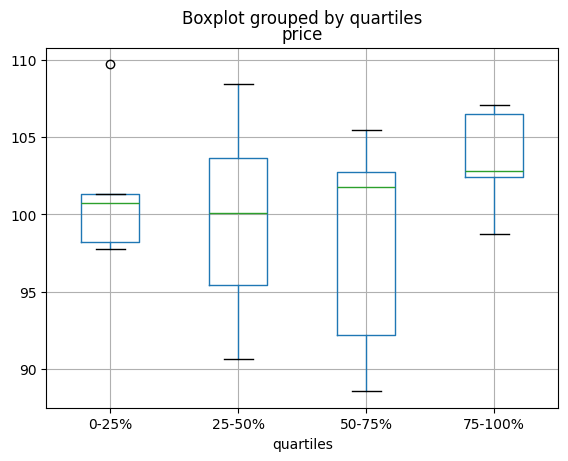

In [157]:
df.boxplot(column='price', by='quartiles')

### Data in/out

### CSV

#### Reading multiple files to create a single DataFrame

In [158]:
for i in range(3):
  data = pd.DataFrame(np.random.randn(10, 4))
  data.to_csv('file_{}.csv'.format(i))

In [159]:
files = ['file_0.csv', 'file_1.csv', 'file_2.csv']

In [160]:
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [161]:
import glob 

import os

In [162]:
files = glob.glob("file_*.csv")

In [163]:
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [164]:
result

Unnamed: 0         0         1         2         3
0            0  0.516787  0.895508 -0.161496 -1.043955
1            1 -1.996015 -0.270795 -0.383164  0.720972
2            2  0.347225 -0.898038  0.316867 -0.915211
3            3  0.734339  0.334739 -1.261901  0.357130
4            4  0.331941 -1.335858  1.277813 -1.560526
5            5 -0.078077  1.091302 -0.292365 -1.191653
6            6  2.249158  1.088842 -0.024648  0.548635
7            7  1.111184  0.164611  0.668668 -1.078582
8            8 -1.768572  0.503183 -0.765255  0.529922
9            9 -0.296064 -0.895885 -1.531863  0.579005
10           0  1.197900  0.872153  0.317639 -0.264766
11           1 -0.498234 -0.307495  0.040889  1.117921
12           2  0.896241  0.737618 -1.632328  0.009608
13           3  0.735758 -0.752360 -0.065702  0.475745
14           4 -1.183882 -1.008982  0.056625 -0.170268
15           5 -0.724728 -1.515343  0.682646 -0.251044
16           6 -0.336572  0.649116  0.534267 -3.166709
17           7  1.298845 -0.969108  0.046377  0.326584
18           8 -0.591360  1.563793 -1.678010  0.638844
19           9  0.557860 -0.599099 -1.704749  0.420756
20           0  0.061810 -0.774780 -1.949365 -0.034299
21           1 -0.539711 -1.423829  0.788260  1.283948
22           2 -0.585265 -0.102628  0.422852 -0.278737
23           3 -0.397421 -0.138981  1.826019 -0.337920
24           4 -0.048180 -2.918425 -0.610429 -0.660184
25           5 -0.597991 -0.424043  1.332387  0.681290
26           6 -0.223192  1.605944  0.334422  0.352198
27           7 -0.917589 -1.121444  0.107274  0.972625
28           8 -0.194660 -0.306473  2.207454  0.637733
29           9  0.375739  1.416579 -0.530943 -0.284280

### Parsing date components in multi-columnsm

In [165]:
i = pd.date_range('20000101', periods=10000)

In [166]:
df = pd.DataFrame({'year': i.year, 'month': i.month, 'day': i.day})

In [167]:
df.head()

year  month  day
0  2000      1    1
1  2000      1    2
2  2000      1    3
3  2000      1    4
4  2000      1    5

In [168]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
%timeit pd.to_datetime(ds)

3.9 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.82 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [169]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

data

';;;;\n ;;;;\n ;;;;\n ;;;;\n ;;;;\n ;;;;\n;;;;\n ;;;;\n ;;;;\n;;;;\ndate;Param1;Param2;Param4;Param5\n    ;m²;°C;m²;m\n;;;;\n01.01.1990 00:00;1;1;2;3\n01.01.1990 01:00;5;3;4;5\n01.01.1990 02:00;9;5;6;7\n01.01.1990 03:00;13;7;8;9\n01.01.1990 04:00;17;9;10;11\n01.01.1990 05:00;21;11;12;13\n'

In [170]:
from io import StringIO

pd.read_csv(
  StringIO(data), 
  sep=';', 
  skiprows=[11, 12], 
  index_col=0, 
  parse_dates=True, 
  header=10,
)

Param1  Param2  Param4  Param5
date                                               
1990-01-01 00:00:00       1       1       2       3
1990-01-01 01:00:00       5       3       4       5
1990-01-01 02:00:00       9       5       6       7
1990-01-01 03:00:00      13       7       8       9
1990-01-01 04:00:00      17       9      10      11
1990-01-01 05:00:00      21      11      12      13

In [171]:
pd.read_csv(StringIO(data), sep=';', header=10, nrows=10).columns

Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [172]:
columns = pd.read_csv(StringIO(data), sep=';', header=10, nrows=10).columns

In [173]:
pd.read_csv(
  StringIO(data), sep=';', index_col=0, header=12, parse_dates=True, names=columns
)

Param1  Param2  Param4  Param5
date                                               
1990-01-01 00:00:00       1       1       2       3
1990-01-01 01:00:00       5       3       4       5
1990-01-01 02:00:00       9       5       6       7
1990-01-01 03:00:00      13       7       8       9
1990-01-01 04:00:00      17       9      10      11
1990-01-01 05:00:00      21      11      12      13

### HDFStore

In [174]:
pip install tables

Note: you may need to restart the kernel to use updated packages.


In [175]:
df = pd.DataFrame(np.random.randn(8, 3))

store = pd.HDFStore('test.h5')

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 836, in H5Fopen
    unable to synchronously open file
  File "H5F.c", line 796, in H5F__open_api_common
    unable to open file
  File "H5VLcallback.c", line 3863, in H5VL_file_open
    open failed
  File "H5VLcallback.c", line 3675, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 128, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 2003, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 603, in H5F__super_read
    truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048

End of HDF5 error back trace

Unable to open/create file 'test.h5'

In [ ]:
store.put('df', df)

In [ ]:
store.get_storer('df').attrs.my_attribute = {'A': 10}

In [ ]:
store.get_storer('df').attrs.my_attribute

In [ ]:
store = pd.HDFStore('test.h5', 'w', driver='H5FD_CORE')

df = pd.DataFrame(np.random.randn(8, 3))

store['test'] = df

store.close()

### Correlationm

In [177]:
df = pd.DataFrame(np.random.random(size=(100, 5)))

corr_mat = df.corr()

mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=1)

corr_mat.where(mask)

0         1         2         3         4
0  1.000000 -0.067250       NaN       NaN       NaN
1 -0.067250  1.000000 -0.093160       NaN       NaN
2 -0.107295 -0.093160  1.000000  0.144145       NaN
3  0.011758  0.121831  0.144145  1.000000  0.141802
4 -0.012512 -0.034225  0.173166  0.141802  1.000000

In [178]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b

In [180]:
df = pd.DataFrame(np.random.normal(size=(100, 3)))

df.corr(method=distcorr)

0         1         2
0  1.000000  0.130534  0.165288
1  0.130534  1.000000  0.126592
2  0.165288  0.126592  1.000000

### Timedeltas

In [181]:
import datetime

s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))

In [182]:
s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [183]:
s.max() - s

0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [184]:
s - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [185]:
s + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [186]:
datetime.datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [187]:
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [189]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])

In [190]:
df = pd.DataFrame({'A': s, 'B': deltas})

In [191]:
df

A      B
0 2012-01-01 0 days
1 2012-01-02 1 days
2 2012-01-03 2 days

In [192]:
df['New Dates'] = df['A'] + df['B']

In [193]:
df['Delta'] = df['A'] - df['New Dates']

In [194]:
df

A      B  New Dates   Delta
0 2012-01-01 0 days 2012-01-01  0 days
1 2012-01-02 1 days 2012-01-03 -1 days
2 2012-01-03 2 days 2012-01-05 -2 days

In [195]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [197]:
y = s - s.shift()

In [198]:
y

0      NaT
1   1 days
2   1 days
dtype: timedelta64[ns]

In [199]:
y[1] = np.nan

In [200]:
y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

### Creating example data

In [201]:
def expand_grid(data_dict):
  rows = itertools.product(*data_dict.values())
  return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [202]:
df = expand_grid(
  {
    'height': [60, 70], 'weight': [100, 140, 180], 'sex': ['Male', 'Female']
  }
)

In [203]:
df

height  weight     sex
0       60     100    Male
1       60     100  Female
2       60     140    Male
3       60     140  Female
4       60     180    Male
5       60     180  Female
6       70     100    Male
7       70     100  Female
8       70     140    Male
9       70     140  Female
10      70     180    Male
11      70     180  Female

### Constant series

In [204]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [206]:
v = s.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [207]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()